$\color{blue}{\text{Author:- Shraddha Dattatray Ghadage}}$



# Task #1: Prediction using supervised machine learning.


$\color{red}{\text{GRIP@ The Sparks Foundation}}$




# To predict the percentage of a student based on the number of study hours.



In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading in the data from source
std=pd.read_csv("http://bit.ly/w-data")
std.head(10).T

,0,1,2,3,4,5,6,7,8,9
Hours,2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7
Scores,21.0,47.0,27.0,75.0,30.0,20.0,88.0,60.0,81.0,25.0


In [3]:
#Discover and visualize the data to gain insights
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
std.nunique()

Hours     23
Scores    23
dtype: int64

In [5]:
#finding statistical properties of the data
std.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#finding number of rows and columns in the data
std.shape

(25, 2)

In [7]:
#checking the existence of missing or null values
std.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
std.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


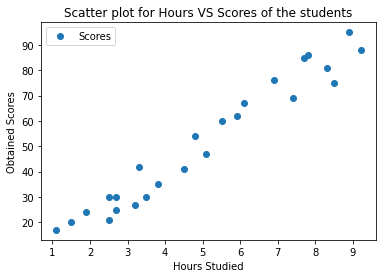

In [9]:
#Scatter diagram for hours vs. scores of students
std.plot(x="Hours", y="Scores",style="o")
plt.xlabel("Hours Studied")
plt.ylabel("Obtained Scores")
plt.title("Scatter plot for Hours VS Scores of the students")
plt.show()

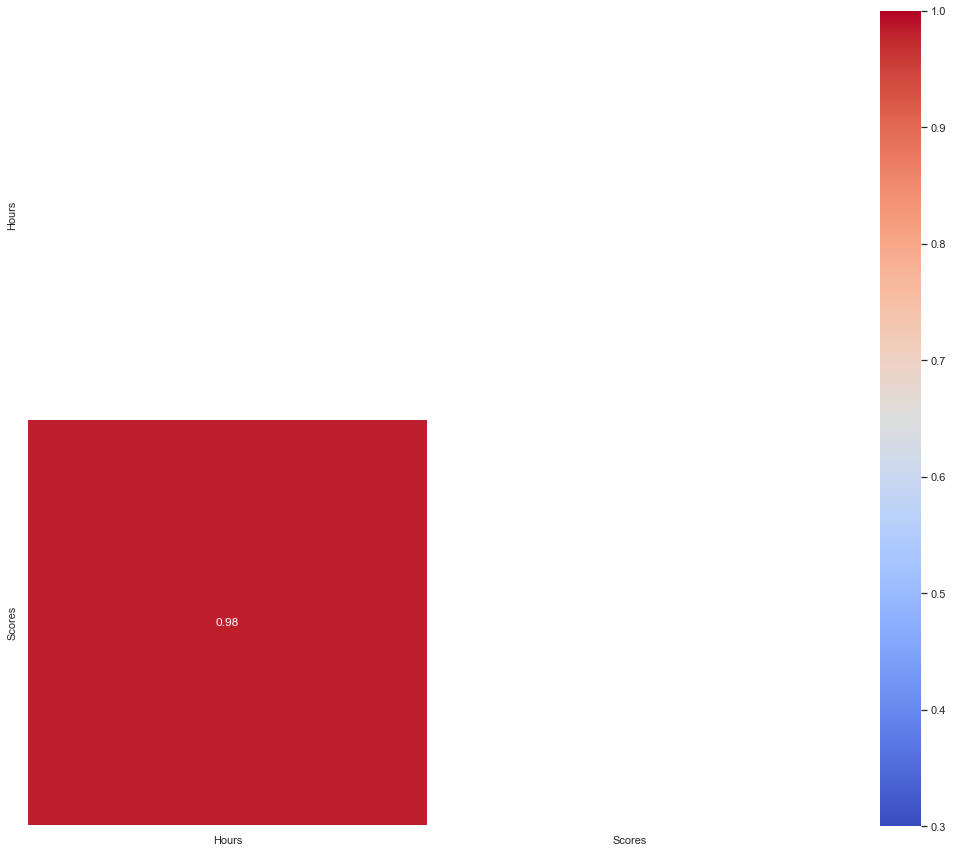

In [10]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = std.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

<AxesSubplot:xlabel='Scores'>

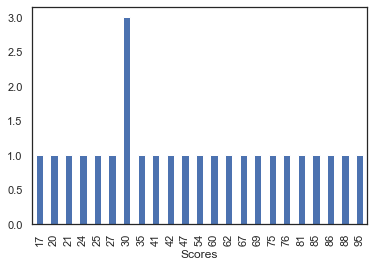

In [11]:
std.groupby(by = 'Scores')['Hours'].count().plot(kind='bar')

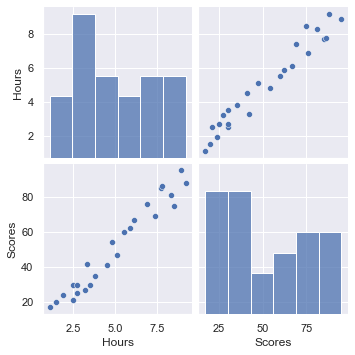

In [12]:
sns.set_style('darkgrid')
sns.pairplot(std)
plt.show()

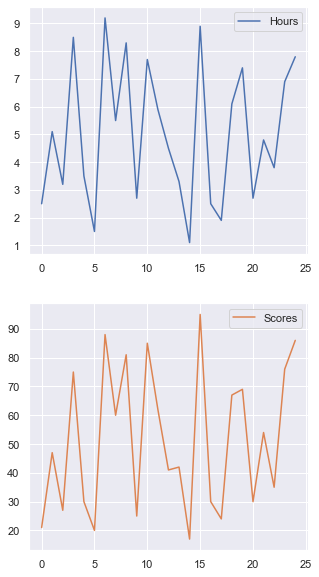

In [13]:
# Univariate Density Plots
from matplotlib import pyplot

std.plot(subplots=True, figsize=(5, 10),sharex=False)
pyplot.show()

# Preprocessing the data

In [14]:
#reshaping the data dividing it into attributes and labels
x=std.iloc[:,:-1]
x.head(10)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
y=std.iloc[:,1]
y.head(10)

0    21
1    47
2    27
3    75
4    30
5    20
6    88
7    60
8    81
9    25
Name: Scores, dtype: int64

# Train Test Split

In [16]:
#Splitting the data into training and testing sets and training the algorithm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#test size=0.2 means 20 percent of the data is used for testing

In [17]:
#Plotting the regression line
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_train)

In [18]:
#Equation of regression line
print(model.intercept_)
print(model.coef_)
lr_regression=model.coef_*x_train+model.intercept_
print("The equation of the fitted regression line is:")
print("Score=",model.coef_,"Hours=",model.intercept_)

2.018160041434683
[9.91065648]
The equation of the fitted regression line is:
Score= [9.91065648] Hours= 2.018160041434683


# Plot Regression Line

Text(0.5, 1.0, 'Regression line')

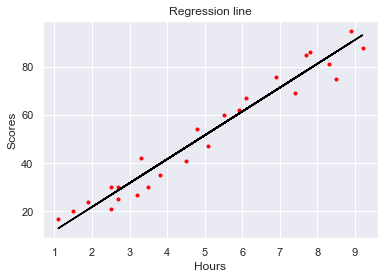

In [19]:
#Plotting the regression line
plt.plot(x,y,".",color="red")
plt.plot(x_train,lr_regression,color="black")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line")

# Predict the Scores based on the Testing dataset

In [20]:
#Prediction of scores based on testing dataset
y_pred=model.predict(x_test)
print("The predicted scores based on the testing dataset is: ",y_pred)

The predicted scores based on the testing dataset is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [21]:
#checking the accuracy of the model
model.score(x_test,y_test) 

0.9454906892105356

In [22]:
#a prediction of score based on 5 hours of study
model.predict([[5]])

C:\Users\shrad\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51.57144244])

# Compare the Actual and the Predicted Scores

In [23]:
#Comparing actual and predicted scores of students
data=pd.DataFrame({"Actual": y_test,"Predicted": y_pred})
data.T

,5,2,19,16,11
Actual,20.000000,27.000000,69.000000,30.000000,62.000000
Predicted,16.884145,33.732261,75.357018,26.794801,60.491033


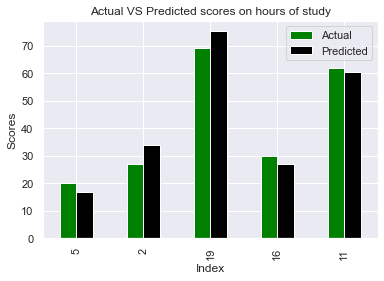

In [24]:
#Bar diagram showing actual and predicted scores of students
data.plot(kind="bar",color=("green","black"))
plt.xlabel("Index")
plt.ylabel("Scores")
plt.title("Actual VS Predicted scores on hours of study")
plt.show()

In [25]:
#Evaluating the model peformance and predicting it's accuracy
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R-2:",metrics.r2_score(y_test,y_pred))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


# Predicting the Percentage Score of a student who studies for 9.25 hours a day ?


In [26]:
#Prediction of percentage score of a student who studies for 9.25 hours per day
print("The expected percentage score of a student who studies 9.25 hours per day is:",model.predict([[9.25]]))

The expected percentage score of a student who studies 9.25 hours per day is: [93.69173249]


C:\Users\shrad\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Hence, we conclude from the fitted model that a student studying for 9.25 hours per day is expected to score 93.69%.

